In [4]:
#Import all needed python routines
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import seaborn as sns
import numpy as np
#sudo apt-get install texlive texlive-latex-extra pandoc --> for PDF download

# Rectified Linear Units - ReLU

Instead of sigmoids, most recent deep learning networks use rectified linear units (ReLUs) for the hidden layers. A rectified linear unit has output 0 if the input is less than 0, and raw output otherwise. That is, if the input is greater than 0, the output is equal to the input. Mathematically, that looks like

$$
f(x) = max(x,0)
$$


$$
\begin{equation} 
f(x)=
    \begin{cases}
      1, & \text{if}\ x>0 \\
      0, & \text{otherwise}
    \end{cases}
\end{equation}
$$

### When to use:
- For Regression or continuous output
- Binary Classification

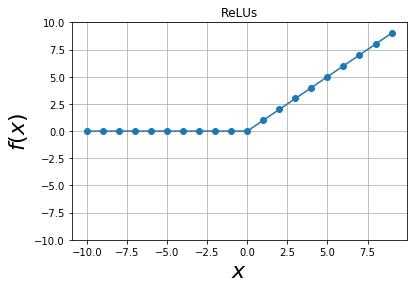

In [5]:
def relus(x):
    """ReLU returns 1 if x>0, else 0."""
    return np.maximum(0,x)

x = np.arange(-10,10,1)
y = relus(x)
plt.plot(x,y, 'o-')
plt.ylim(-10,10); 
plt.grid(); 
plt.xlabel('$x$', fontsize=22); 
plt.ylabel('$f(x)$', fontsize=22)
plt.title("ReLUs")

## Derivative of ReLU
A "derivative" is just the slope of the graph at certain point. So what is the slope of the graph at the point  x=2 ?
We can visually look at the segment where x=2 and see that the slope is 1. In fact, this holds everywhere >0. The slope is 1.
What is the slope of the graph when x=-2? Visually, we see that there is no slope (change in Y), so the slope is 0. In fact, for all negative numbers, the slope is 0.
Let's graph the same plot again, but this time, plot all negative x values in blue, and all positive x values in green.

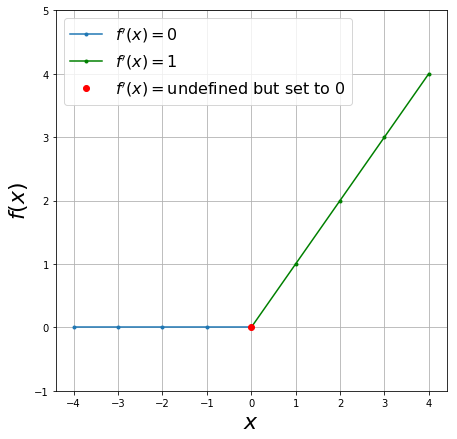

In [6]:
plt.figure(figsize=(7,7))

X_neg = np.arange(-4,1,1) # Negative numbers.
plt.plot(X_neg,relus(X_neg),'.-', label='$f\'(x) =0$'); # Plot negative x, f(x)

X_pos = np.arange(0,5,1) # Positive numbers
plt.plot(X_pos, relus(X_pos), '.-g',label='$f\'(x)=1$') # Plot positive x, f(x)

plt.plot(0,relus(0),'or',label='$f \'(x)=$undefined but set to 0') # At 0.

plt.ylim(-1,5); 
plt.grid(); 
plt.xlabel('$x$', fontsize=22); 
plt.ylabel('$f(x)$', fontsize=22) 
# Make plot look nice.
plt.legend(loc='best', fontsize=16)

Now what about x=0? Technically this is undefined. When x=0, there are many possible lines (slopes) we could fit through it. So what do we do here?
Basically we just choose a slope to use when x=0. A common choice is when x=0, the derivative will be 0. It could be some other value, but most implementations use this (this has a nice property that it encourages many values to be 0 i.e., sparsity in the feature map).

## Drawbacks
It's possible that a large gradient can set the weights such that a ReLU unit will always be 0. These "dead" units will always be 0 and a lot of computation will be wasted in training.